In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../')
import pathlib
directory_path = str(pathlib.Path('__notebook__').parent.resolve())


from tabularmagic.api import TabularMagic
from tabularmagic.api.mlR import (LinearR, RobustLinearR, 
    SVMR, MLPR, TreeEnsembleR)
from tabularmagic.api.mlC import LinearC



df_train = pd.read_csv(f'{directory_path}/house_price_data/train.csv', index_col='Id')

display(df_train.head())
print('df shape:', df_train.shape)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


df shape: (1460, 80)


In [2]:
tm = TabularMagic(df_train, test_size=0.3, name='Housing sale price data')
tm

INFO: TabularMagic initialization complete. Shapes of train, test
      datasets: (1022, 80), (438, 80).


Housing sale price data
--------------------------------------------------------------------------------
Train shape: (1022, 80)                  Test shape: (438, 80)                  
--------------------------------------------------------------------------------
Categorical variables: MSZoning, Street, Alley, LotShape, LandContour, 
Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType,
 HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, 
ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, 
BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, 
KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, 
GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition
                                                                                
Continuous variables: MSSubClass, LotFrontage, LotArea, OverallQual,
OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, 

In [3]:
tm.datahandler().load_data_checkpoint()
tm.datahandler().drop_highly_missing_vars(
    threshold=0.5
).impute(
    continuous_strategy='mean',
    categorical_strategy='most_frequent'
).scale(
    strategy='standardize'
).save_data_checkpoint('finished preprocessing')
tm.datahandler().head()

INFO: Working datasets reset to original datasets. Shapes of train,
      test datasets: (1022, 80), (438, 80).
INFO: Dropped variables MasVnrType, Fence, Alley, MiscFeature, PoolQC
      with more than 50.0% missing values.
INFO: Imputed missing values with continuous strategy "mean",
      categorical strategy "most_frequent".
INFO: Scaled variables MSSubClass, LotFrontage, LotArea, OverallQual,
      OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2,
      BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea,
      BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr,
      KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars,
      GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch,
      ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice using strategy
      "standardize".
INFO: Saved working datasets checkpoint "finished preprocessing".


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
893,-0.868950,RL,-0.016287,-0.205881,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,-0.093513,2.194045,-0.260141,0.879717,Hip,CompShg,HdBoard,HdBoard,-0.610671,TA,TA,CBlock,TA,TA,No,GLQ,0.471617,Unf,-0.280335,-0.393065,-0.001718,GasA,TA,Y,SBrkr,-0.261295,-0.802294,-0.120313,-0.869102,-0.814295,3.901704,-1.069941,-0.758517,0.135175,-0.212318,TA,-0.334480,Typ,-0.943262,Gd,Attchd,-0.649468,RFn,-1.073062,-1.022939,TA,TA,Y,0.717564,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-1.647524,-1.368961,WD,Normal,-0.345616
1106,0.068942,RL,1.199817,0.133392,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,1.365574,-0.508624,0.748522,0.493933,Gable,CompShg,HdBoard,HdBoard,1.489470,Gd,TA,PConc,Ex,TA,Av,GLQ,1.274234,Unf,-0.280335,-0.314552,0.901672,GasA,Ex,Y,SBrkr,0.848218,1.742448,-0.120313,2.059040,1.112115,-0.247663,0.767840,1.265515,0.135175,-0.212318,Gd,1.506662,Typ,2.131743,TA,Attchd,0.634831,RFn,0.296063,1.127379,TA,TA,Y,0.671981,-0.253360,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.892471,1.649546,WD,Normal,1.852130
414,-0.634477,RM,-0.624339,-0.157666,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,-0.823057,0.392266,-1.431491,-1.676106,Gable,CompShg,WdShing,Wd Shng,-0.610671,TA,TA,CBlock,TA,TA,No,Unf,-0.970484,Unf,-0.280335,0.979790,-0.115759,GasA,Gd,Y,FuseA,-0.364028,-0.802294,-0.120313,-0.944472,-0.814295,-0.247663,-1.069941,-0.758517,-1.098297,-0.212318,TA,-0.948194,Typ,0.594240,Gd,Detchd,-2.140911,Unf,0.296063,-0.562156,TA,TA,Y,-0.741099,-0.715974,1.767303,-0.119317,-0.275896,-0.069193,-0.122987,-1.269997,1.649546,WD,Normal,-0.854771
523,-0.165531,RM,-0.884933,-0.507359,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,-0.093513,1.293156,-0.780741,-1.676106,Gable,CompShg,CemntBd,CmentBd,-0.610671,TA,Gd,CBlock,TA,TA,No,ALQ,-0.102613,Unf,-0.280335,0.075769,-0.124704,GasA,Ex,Y,SBrkr,-0.425667,0.694613,-0.120313,0.253918,-0.814295,-0.247663,0.767840,-0.758517,0.135175,-0.212318,TA,0.279234,Typ,2.131743,Gd,Detchd,-1.188045,Unf,0.296063,-0.274167,TA,TA,Y,-0.741099,-0.369014,0.238954,-0.119317,-0.275896,-0.069193,-0.122987,1.372691,-1.368961,WD,Normal,-0.287611
1037,-0.868950,RL,0.808926,0.190085,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,2.095118,-0.508624,1.171509,1.120833,Hip,CompShg,VinylSd,VinylSd,-0.204567,Gd,TA,PConc,Ex,TA,Gd,GLQ,1.252482,Unf,-0.280335,0.060067,1.252742,GasA,Ex,Y,SBrkr,1.156417,-0.802294,-0.120313,0.171011,1.112115,-0.247663,0.767840,-0.758517,-1.098297,-0.212318,Ex,-0.334480,Typ,0.594240,Ex,Attchd,1.214837,Fin,1.665189,2.087343,TA,TA,Y,0.991063,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,0.995164,0.894920,WD,Normal,1.729675


In [4]:
tm.datahandler().load_data_checkpoint('finished preprocessing')
tm.eda().categorical_summary_statistics()

INFO: Working datasets reset to checkpoint "finished preprocessing".
      Shapes of train, test datasets: (1022, 75), (438, 75).


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Statistic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
n_unique_vals,5,2,4,4,2,5,3,25,9,6,5,8,6,7,14,16,4,5,6,4,4,4,6,6,6,5,2,4,4,7,5,6,3,5,5,3,9,6
most_common_val,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
least_common_val,C (all),Grvl,IR3,Low,NoSeWa,FR3,Sev,Blueste,RRNe,RRAe,2fmCon,2.5Fin,Shed,Metal,CBlock,Other,Fa,Po,Wood,Fa,Po,Mn,LwQ,GLQ,Floor,Po,N,FuseP,Fa,Sev,Po,2Types,Fin,Po,Ex,P,Oth,AdjLand
n_missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
missing_rate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022


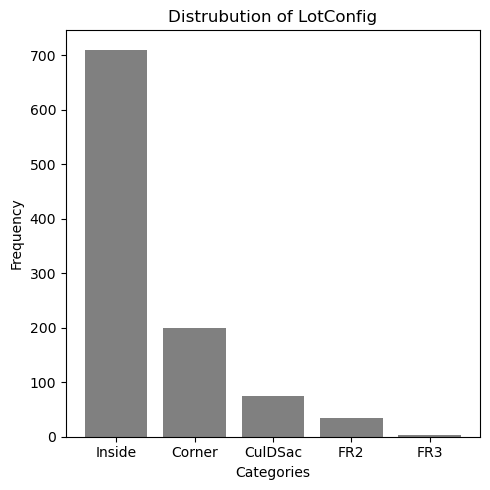

In [5]:
tm.eda().plot_distribution('LotConfig')

In [8]:
report = tm.ml_classification(
    models=[
        LinearC(type='l1', verbose=1),
        LinearC(type='l2')
    ],
    y_var='LotConfig',
    X_vars=['LotArea', 'LotFrontage', 'MSSubClass', 'MSZoning', 'SalePrice'],
    outer_cv=2
)

INFO: Fitting model LogisticRegressor(l1).
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
INFO: Fitted model LogisticRegressor(l1).
INFO: Fitting model LogisticRegressor(l2).
INFO: Fitted model LogisticRegressor(l2).


In [10]:
report.fit_statistics('test')

,LogisticRegressor(l1)_test,LogisticRegressor(l2)_test
Statistic,,
accuracy,0.773973,0.773973
f1,0.209738,0.225411
precision,0.539292,0.529245
recall,0.215808,0.225749
n,438,438


In [4]:
tm.datahandler().load_data_checkpoint('finished preprocessing')
report = tm.ml_regression(
    models=[
        LinearR(type='ols'),
        LinearR(type='l2'), 
        # RobustLinearR(type='huber'),
        # SVMR(type='linear'),
        # MLPR(),
        # TreeEnsembleR(type='adaboost'),
    ],
    y_var='SalePrice',
    # X_vars=['LotFrontage', 'LotArea', 'SaleCondition'], 
    outer_cv=5
)

INFO: Working datasets reset to checkpoint "finished preprocessing".
      Shapes of train, test datasets: (1022, 75), (438, 75).
INFO: Fitting model LinearR(ols).
INFO: Fitted model LinearR(ols).
INFO: Fitting model LinearR(l2).
INFO: Fitted model LinearR(l2).


In [6]:
report.fit_statistics('test')

,LinearR(ols)_test,LinearR(l2)_test
Statistic,,
rmse,44000.33976,29676.628606
mad,19340.635854,19050.178977
pearsonr,0.865117,0.936061
spearmanr,0.933906,0.937557
r2,0.722556,0.87379
adjr2,0.41989,0.736107
n,438,438


In [7]:
report.fit_statistics('test')

,LinearR(ols)_test,LinearR(l2)_test
Statistic,,
rmse,44000.33976,29676.628606
mad,19340.635854,19050.178977
pearsonr,0.865117,0.936061
spearmanr,0.933906,0.937557
r2,0.722556,0.87379
adjr2,0.41989,0.736107
n,438,438


In [8]:
report['LinearR(ols)'].test_report().fit_statistics()

,LinearR(ols)_test
Statistic,
rmse,44000.33976
mad,19340.635854
pearsonr,0.865117
spearmanr,0.933906
r2,0.722556
adjr2,0.41989
n,438


In [9]:
report['LinearR(ols)'].train_report().cv_fit_statistics()

,,LinearR(ols)_train_cv
Statistic,Fold,
rmse,0,493297330336256.75
mad,0,34453380054323.4375
pearsonr,0,-0.048939
spearmanr,0,0.914021
r2,0,-39066345461574909952.0
adjr2,0,379501641626727677952.0
n,0,205
rmse,1,4495304105696548.0
mad,1,700365041815929.5
